In [30]:
!pip install xgboost
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error

In [31]:
#read data
data='adult.data'
f=pd.read_csv(data,sep=",", skipinitialspace=True,names=['age','workclass','fnlwgt','education','education-num'
,'marital-status','occupation','relationship','race','sex',
'capital-gain','capital-loss','hours-per-week','native-country','income'])
cf=f.copy()
df=pd.DataFrame(cf)


testdata='adult.test'
tf=pd.read_csv(testdata,skiprows=[0],sep=",", skipinitialspace=True,names=['age','workclass','fnlwgt','education','education-num'
,'marital-status','occupation','relationship','race','sex',
'capital-gain','capital-loss','hours-per-week','native-country','income'])
tcf=tf.copy()
tdf=pd.DataFrame(tcf)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [33]:
tdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education-num   16281 non-null  int64 
 5   marital-status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital-gain    16281 non-null  int64 
 11  capital-loss    16281 non-null  int64 
 12  hours-per-week  16281 non-null  int64 
 13  native-country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [34]:
#missing data&error data fixing
df['workclass'] = df['workclass'].replace('?', 'Private')
df['occupation'] = df['occupation'].replace('?', 'Prof-specialty')
df['native-country'] = df['native-country'].replace('?', 'United-States')
df = df.drop(['education','fnlwgt'],axis=1)

tdf['workclass'] = tdf['workclass'].replace('?', 'Private')
tdf['occupation'] = tdf['occupation'].replace('?', 'Prof-specialty')
tdf['native-country'] = tdf['native-country'].replace('?', 'United-States')
tdf = tdf.drop(['education','fnlwgt'],axis=1)


#label encoder
df['marital-status'] = LabelEncoder().fit_transform(df['marital-status'])
df['relationship'] = LabelEncoder().fit_transform(df['relationship'])
df['occupation'] = LabelEncoder().fit_transform(df['occupation'])
df['race'] = LabelEncoder().fit_transform(df['race'])
df['native-country'] = LabelEncoder().fit_transform(df['native-country'])
df['sex'] = LabelEncoder().fit_transform(df['sex'])

tdf['marital-status'] = LabelEncoder().fit_transform(tdf['marital-status'])
tdf['relationship'] = LabelEncoder().fit_transform(tdf['relationship'])
tdf['occupation'] = LabelEncoder().fit_transform(tdf['occupation'])
tdf['race'] = LabelEncoder().fit_transform(tdf['race'])
tdf['native-country'] = LabelEncoder().fit_transform(tdf['native-country'])
tdf['sex'] = LabelEncoder().fit_transform(tdf['sex'])

#order encode
workclass_map = {'Never-worked':0,'Without-pay':1,'Private':2,
                 'Self-emp-not-inc':3,'Local-gov':4,'State-gov':5,
                 'Federal-gov':6,'Self-emp-inc':7}
income_map = {'<=50K':0,'>50K':1}
test_income_map = {'<=50K.':0,'>50K.':1}
df['workclass'] = df['workclass'].map(workclass_map)
df['income'] = df['income'].map(income_map)

tdf['workclass'] = tdf['workclass'].map(workclass_map)
tdf['income'] = tdf['income'].map(test_income_map)

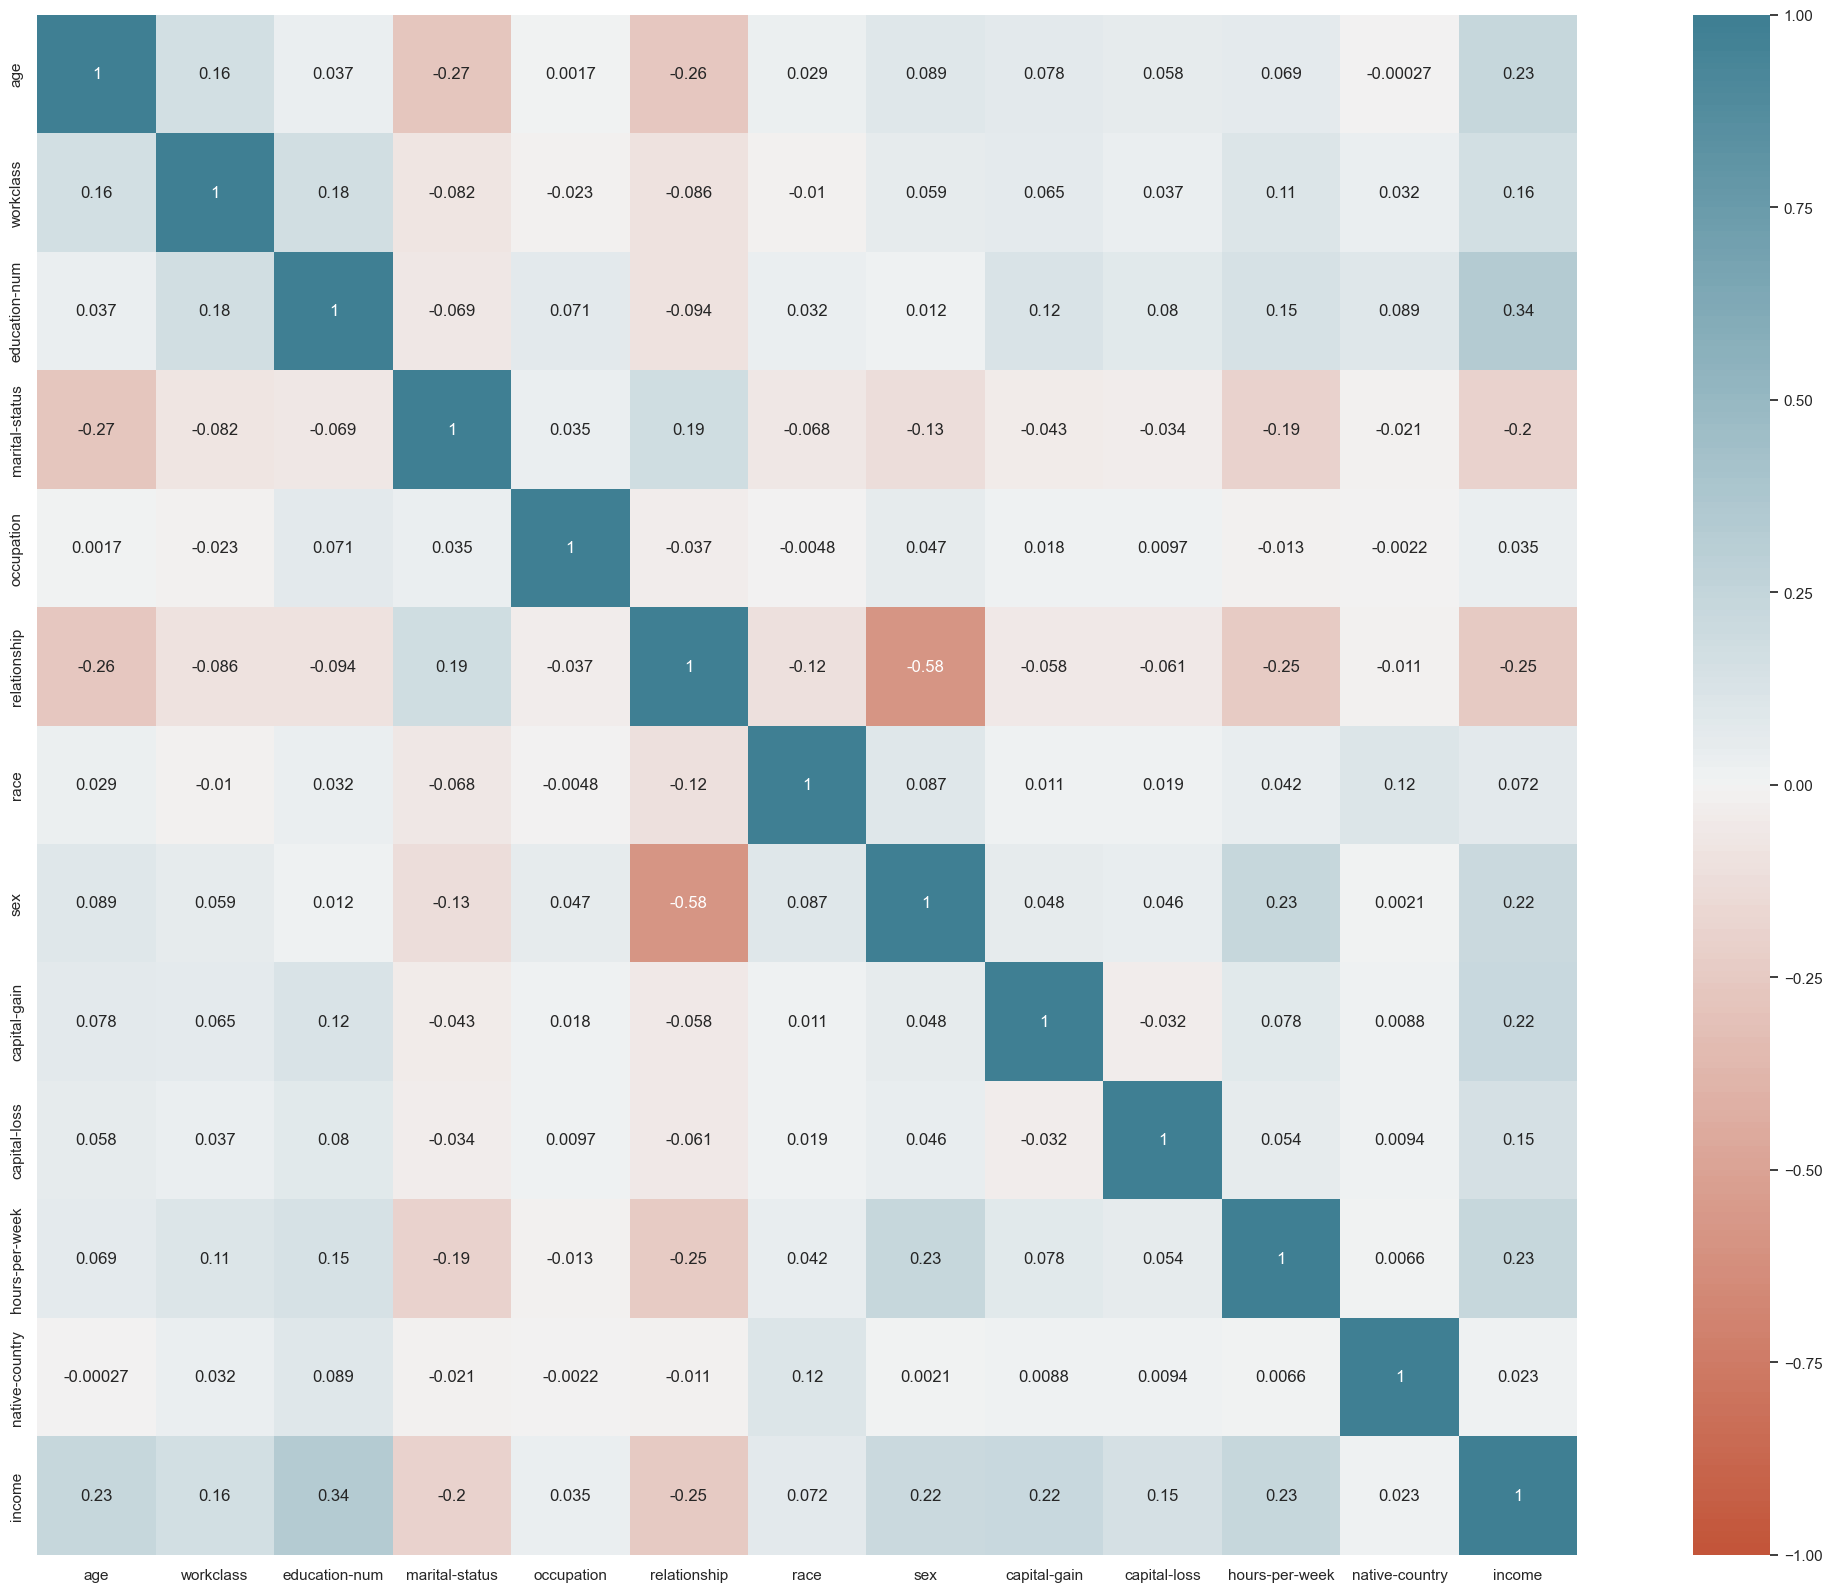

In [35]:
corr = df.corr()
ax = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
sns.set(rc = {'figure.figsize':(30,20)})

In [36]:
scaler_x = StandardScaler().fit(df.drop(['hours-per-week','native-country'],axis=1))
scaler_t = StandardScaler().fit(tdf.drop(['hours-per-week','native-country'],axis=1))
X_train = scaler_x.transform(df.drop(['hours-per-week','native-country'],axis=1))
X_test = scaler_t.transform(tdf.drop(['hours-per-week','native-country'],axis=1))
y_train =df['hours-per-week']
y_test = tdf['hours-per-week']

In [37]:
#KNN-Training
knnReg = KNeighborsRegressor()

knnReg.fit(X_train,y_train)
pred_Knn = knnReg.predict(X_test)

#MSE
print('-----MSE-----')
print(mean_squared_error(y_test, pred_Knn))
#MAE
print('-----MAE-----')
print(mean_absolute_error(y_test, pred_Knn))
#MAPE
print('-----MAPE-----')
print(mean_absolute_percentage_error(y_test, pred_Knn))
#RMSE
print('-----RMSE-----')
print(np.sqrt(mean_squared_error(y_test, pred_Knn)))
#R2
print('-----R^2-----')
print(r2_score(y_test, pred_Knn))

-----MSE-----
133.8682021988821
-----MAE-----
8.094281678029605
-----MAPE-----
0.32416974376522867
-----RMSE-----
11.570142704343889
-----R^2-----
0.14035050598536614


In [38]:
#svr
svrReg = SVR()
svrReg.fit(X_train,y_train)
pred_svr =svrReg.predict(X_test)

#MSE
print('-----MSE-----')
print(mean_squared_error(y_test, pred_svr))
#MAE
print('-----MAE-----')
print(mean_absolute_error(y_test, pred_svr))
#MAPE
print('-----MAPE-----')
print(mean_absolute_percentage_error(y_test, pred_svr))
#RMSE
print('-----RMSE-----')
print(np.sqrt(mean_squared_error(y_test, pred_svr)))
#R2
print('-----R^2-----')
print(r2_score(y_test, pred_svr))

-----MSE-----
131.5754930674985
-----MAE-----
7.120935269278293
-----MAPE-----
0.32107437697179125
-----RMSE-----
11.470636123053442
-----R^2-----
0.15507339172180512


In [39]:
#randomforest
rfReg = RandomForestRegressor(max_depth=2, random_state=0)
rfReg.fit(X_train,y_train)
pred_rf=rfReg.predict(X_test)

#MSE
print('-----MSE-----')
print(mean_squared_error(y_test, pred_rf))
#MAE
print('-----MAE-----')
print(mean_absolute_error(y_test, pred_rf))
#MAPE
print('-----MAPE-----')
print(mean_absolute_percentage_error(y_test, pred_rf))
#RMSE
print('-----RMSE-----')
print(np.sqrt(mean_squared_error(y_test, pred_rf)))
#R2
print('-----R^2-----')
print(r2_score(y_test, pred_rf))

-----MSE-----
131.96683844241792
-----MAE-----
7.804386544407512
-----MAPE-----
0.3302659284016875
-----RMSE-----
11.487682030871934
-----R^2-----
0.15256032403277586


In [40]:
#XGBoost
xgboostReg = xgb.XGBRegressor()
xgboostReg.fit(X_train, y_train)
pred_xgboost = xgboostReg.predict(X_test)

#MSE
print('-----MSE-----')
print(mean_squared_error(y_test, pred_xgboost))
#MAE
print('-----MAE-----')
print(mean_absolute_error(y_test, pred_xgboost))
#MAPE
print('-----MAPE-----')
print(mean_absolute_percentage_error(y_test, pred_xgboost))
#RMSE
print('-----RMSE-----')
print(np.sqrt(mean_squared_error(y_test, pred_xgboost)))
#R2
print('-----R^2-----')
print(r2_score(y_test, pred_xgboost))

-----MSE-----
203.7754844148359
-----MAE-----
10.632704209464238
-----MAPE-----
0.4060870891394252
-----RMSE-----
14.274995075825275
-----R^2-----
-0.30856685301226383
